<a href="https://colab.research.google.com/github/cho52o/statistical_overall_design2021/blob/main/data2_%EB%B6%84%EC%84%9D_%EB%B0%95%EC%B4%88%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필수 불러오기

### 한국 주식 데이터: KRX

In [ ]:
!pip install -U finance-datareader
import FinanceDataReader as fdr
df_krx=fdr.StockListing('KRX')
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7048 entries, 0 to 7047
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          7048 non-null   object        
 1   Market          7048 non-null   object        
 2   Name            7048 non-null   object        
 3   Sector          2449 non-null   object        
 4   Industry        2430 non-null   object        
 5   ListingDate     2449 non-null   datetime64[ns]
 6   SettleMonth     2449 non-null   object        
 7   Representative  2449 non-null   object        
 8   HomePage        2266 non-null   object        
 9   Region          2449 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 605.7+ KB


In [ ]:
def get_data(symbol,start,end):
  return fdr.DataReader(symbol,start,end)

### 구글 드라이브 연동

- 데이터 불러올 때 사용

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### package

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import datetime as dt

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# 기업별 자료 불러오기

삼성

In [ ]:
stem1 = get_data('005930','2018-03-01','2021-03-01') #삼성전자

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/통계적종합설계/data2/SS_20180301-20210301.csv")

SK

In [ ]:
stem1 = get_data('000660','2018-03-01','2021-03-01') # SK하이닉스

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/통계적종합설계/data2/SK_20180301-20210301.csv")

LG

In [ ]:
stem1 = get_data('003550','2018-03-01','2021-03-01') # LG

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/통계적종합설계/data2/LG_20180301-20210301.csv")

SSG

In [ ]:
stem1 = get_data('001040','2018-03-01','2021-03-01') # 신세계

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/통계적종합설계/data2/SSG_20180301-20210301.csv")

CJ

In [ ]:
stem1 = get_data('001040','2018-03-01','2021-03-01') # CJ

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/통계적종합설계/data2/CJ_20180301-20210301.csv")

KAKAO

In [ ]:
stem1 = get_data('035720','2018-03-01','2021-03-01') # 카카오

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/통계적종합설계/data2/KAKAO_20180301-20210301.csv")

## 키워드 저장

In [ ]:
# 현호님 코드
s=stem1['Close']
d = pd.Series(s.values[1:] - s.values[:-1], index=s.index[:-1]).abs()
a = .7  # LG와 KAKAO는 point 5개 나옴. 기울기를 .9로 변환. 
m = d.max()
ex=d > m * a
ex[ex]

Date
2020-03-23    True
2021-01-07    True
dtype: bool

In [ ]:
exex=ex[ex]
ex1=exex.to_frame()
ex1.reset_index(inplace=True)
ex2=ex1.iloc[:,0]
vls=[ex2[i].strftime('%Y-%m-%d') for i in range(len(ex2))]

In [ ]:
print(ex2)

0   2020-03-23
1   2021-01-07
Name: Date, dtype: datetime64[ns]


In [ ]:
# 데이터 처리 과정에서 실패하면 빠르게 다시 돌아올 수 있게 원본은 건드리지 말기.
data1 = data.copy()

In [ ]:
# 일자를 활용하여 datetime 열 생성. 
data1['date'] = pd.to_datetime(data1['일자'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

In [ ]:
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

In [ ]:
# 변곡점을 기준으로 앞뒤 일주일 계산.(변곡점: a0, b0) 
a_7 = to_integer((ex2[0] - dt.timedelta(days=7)).date())
a0 = to_integer(ex2[0].date())
a7 = to_integer((ex2[0] + dt.timedelta(days=7)).date())
b_7 = to_integer((ex2[1] - dt.timedelta(days=7)).date())
b0 = to_integer(ex2[1].date())
b7 = to_integer((ex2[1] + dt.timedelta(days=7)).date())
print(a_7, a0, a7, b_7, b0, b7)

20200316 20200323 20200330 20201231 20210107 20210114


In [ ]:
# 위에서 계산한 날짜를 기준으로 dataframe 생성. 
data2 = data1[data1["일자"]>= a_7]
vls0_7 = data2[data2["일자"]<= a0]  # vls0_7: 첫번째 변곡점 기준 일주일 전 뉴스
data3 = data1[data1["일자"]>= a0]
vls07 = data3[data3["일자"]<= a7]  # vls07: 첫번째 변곡점 기준 일주일 후 뉴스
data4 = data1[data1["일자"]>= b_7]
vls1_7 = data4[data4["일자"]<= b0]  # vls1_7: 두번째 변곡점 기준 일주일  뉴스
data5 = data1[data1["일자"]>= b0]
vls17 = data5[data5["일자"]<= b7]  # vls17: 두번째 변곡점 기준 일주일 후 뉴스

In [ ]:
# null 값 확인. 
print(vls0_7["키워드"].isnull().sum())
print(vls07["키워드"].isnull().sum())
print(vls1_7["키워드"].isnull().sum())
print(vls17["키워드"].isnull().sum())

0
0
0
0


In [ ]:
# vls0_7, vls07, vls1_7, vls17
df = vls07
n = len(df.groupby("date"))
df_list = [pd.DataFrame() for x in range(n)]
date = list()
k=0
j=1
for i in df.index:
  if df['date'][i] == df['date'][df.index[j]]:
    df_list[k] = df_list[k].append(pd.DataFrame(df['키워드'][i].split(","), columns=["키워드"]), ignore_index = True)
    if j < len(df)-1:
      j+=1
  else:
    k+=1
    j+=1
    print(df['date'][df.index[j]], i, j, k)
    date.append(df['date'][df.index[j]])
print(df_list[0].count())

2020-03-29 4496 37 1
2020-03-28 4505 46 2
2020-03-27 4509 50 3
2020-03-26 4523 64 4
2020-03-25 4548 89 5
2020-03-24 4586 127 6
2020-03-23 4633 174 7
키워드    5663
dtype: int64


In [ ]:
df_list[7].head(2)

,키워드
0,권태선
1,위원


In [ ]:
# 키워드별 빈도 수 계산 및 정렬. 
n = len(df.groupby("date"))
df_bin = [pd.DataFrame() for x in range(n)]
df_bin_sort = [pd.DataFrame() for x in range(n)]
for i in range(n):
  df_bin[i] = df_list[i].groupby(['키워드']).size().reset_index() # 계산
  df_bin[i].rename(columns = {0: '빈도'}, inplace = True) # column명 '빈도'로 변경
  df_bin_sort[i] = df_bin[i].sort_values(by=['빈도'], axis=0, ascending=False) # 인덱스 정렬(내림차순)

In [ ]:
df_bin[7]
df_bin_sort[7].head(2)

,키워드,빈도
755,삼성전자,112
742,삼성,109


In [ ]:
date

['2020-03-29',
 '2020-03-28',
 '2020-03-27',
 '2020-03-26',
 '2020-03-25',
 '2020-03-24',
 '2020-03-23']

In [ ]:
df_bin_sort[0].to_csv("/content/drive/MyDrive/통계적종합설계/SS200330.csv")
df_bin_sort[1].to_csv("/content/drive/MyDrive/통계적종합설계/SS200329.csv")
df_bin_sort[2].to_csv("/content/drive/MyDrive/통계적종합설계/SS200328.csv")
df_bin_sort[3].to_csv("/content/drive/MyDrive/통계적종합설계/SS200327.csv")
df_bin_sort[4].to_csv("/content/drive/MyDrive/통계적종합설계/SS200326.csv")
df_bin_sort[5].to_csv("/content/drive/MyDrive/통계적종합설계/SS200325.csv")
df_bin_sort[6].to_csv("/content/drive/MyDrive/통계적종합설계/SS200324.csv")
#df_bin_sort[7].to_csv("/content/drive/MyDrive/통계적종합설계/SS200323.csv")

## 뉴스 데이터 합치기

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/통계적종합설계/SS200316.csv')
df2 = pd.read_csv('/content/drive/MyDrive/통계적종합설계/SS200317.csv')
df3 = pd.read_csv('/content/drive/MyDrive/통계적종합설계/SS200318.csv')
df4 = pd.read_csv('/content/drive/MyDrive/통계적종합설계/SS200319.csv')
df5 = pd.read_csv('/content/drive/MyDrive/통계적종합설계/SS200320.csv')
df6 = pd.read_csv('/content/drive/MyDrive/통계적종합설계/SS200321.csv')
df7 = pd.read_csv('/content/drive/MyDrive/통계적종합설계/SS200322.csv')
df8 = pd.read_csv('/content/drive/MyDrive/통계적종합설계/SS200323.csv')

In [ ]:
df = df1.T.tail(2)
df1 = df1.T.tail(2).rename(columns=df.iloc[0]).drop(['키워드'])
df = df2.T.tail(2)
df2 = df2.T.tail(2).rename(columns=df.iloc[0]).drop(['키워드'])
df = df3.T.tail(2)
df3 = df3.T.tail(2).rename(columns=df.iloc[0]).drop(['키워드'])
df = df4.T.tail(2)
df4 = df4.T.tail(2).rename(columns=df.iloc[0]).drop(['키워드'])
df = df5.T.tail(2)
df5 = df5.T.tail(2).rename(columns=df.iloc[0]).drop(['키워드'])
df = df6.T.tail(2)
df6 = df6.T.tail(2).rename(columns=df.iloc[0]).drop(['키워드'])
df = df7.T.tail(2)
df7 = df7.T.tail(2).rename(columns=df.iloc[0]).drop(['키워드'])
df = df8.T.tail(2)
df8 = df8.T.tail(2).rename(columns=df.iloc[0]).drop(['키워드'])

In [ ]:
ind = pd.date_range(start='2020-03-16', end='2020-03-23')

#날짜 없는 날 인덱스 거민하기. 

In [ ]:
da = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8], ignore_index=True)

In [ ]:
da1 = da.set_index(ind)

In [ ]:
da1

,삼성전자,삼성,시장,안전,스마트폰,파운드리,BBK,임직원,중국,이사,세계,오포,점유,미국,반도체,코로나19,비보,케이스,환경,포럼,변호사,리얼미,생산,화웨이,브랜드,수사,원플러스,협력사,회사,1위,연기,공정,후보,사외,계열사,인도,행사,1,사업장,부회장,...,기피,긴급명령,드래곤,반토막,발상,법감,벼랑,복합기업8,분수령,불이익,브로츠와프,비리,비보도,비상경영,비상계획,비상대응,비상체제,비자카드,반납,박진석,렌탈,로즈,마크,마하라슈트라주,만전,매도호,맥쿼리인프라,멀티미디어리서치연구소,메탈,멤버십,명분용,모듈,무선청소기,무세제통세척,무풍갤러리,물거품,므와바,미시간,미주,힌두스탄
2020-03-16,57,51,37,23,23,20,18,17,17,16,16,15,14,14,13,13,13,13,13,13,12,12,12,11,11,11,10,10,10,9,9,9,9,9,8,8,8,8,7,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-17,133,13,39,2,44,4,NaN,NaN,14,8,18,1,5,14,13,14,NaN,NaN,1,6,3,NaN,5,2,2,NaN,NaN,NaN,5,5,13,1,NaN,1,1,1,13,2,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-18,126,39,62,3,33,11,NaN,2,15,22,13,NaN,11,12,31,42,NaN,NaN,3,NaN,1,NaN,8,1,3,NaN,NaN,1,11,4,2,4,1,4,NaN,3,5,1,NaN,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-19,65,36,15,NaN,3,2,NaN,6,4,1,8,NaN,NaN,5,6,22,NaN,NaN,1,NaN,NaN,NaN,6,NaN,5,3,NaN,1,5,2,NaN,NaN,NaN,NaN,2,NaN,1,NaN,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-20,116,20,30,5,2,27,NaN,1,19,2,6,NaN,14,10,23,35,NaN,NaN,1,NaN,NaN,NaN,18,NaN,2,NaN,NaN,NaN,7,3,4,17,NaN,NaN,2,NaN,NaN,NaN,4,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-21,12,4,4,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,7,1,NaN,NaN,1,NaN,NaN,NaN,3,NaN,1,NaN,NaN,NaN,58,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-22,13,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,6,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-23,105,109,43,5,46,NaN,NaN,5,10,NaN,8,4,16,22,1,23,3,NaN,NaN,NaN,1,NaN,63,2,2,1,NaN,2,1,4,5,NaN,NaN,NaN,24,59,6,2,14,22,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
da2 = da1.fillna(0)

In [ ]:
da2

,삼성전자,삼성,시장,안전,스마트폰,파운드리,BBK,임직원,중국,이사,세계,오포,점유,미국,반도체,코로나19,비보,케이스,환경,포럼,변호사,리얼미,생산,화웨이,브랜드,수사,원플러스,협력사,회사,1위,연기,공정,후보,사외,계열사,인도,행사,1,사업장,부회장,...,기피,긴급명령,드래곤,반토막,발상,법감,벼랑,복합기업8,분수령,불이익,브로츠와프,비리,비보도,비상경영,비상계획,비상대응,비상체제,비자카드,반납,박진석,렌탈,로즈,마크,마하라슈트라주,만전,매도호,맥쿼리인프라,멀티미디어리서치연구소,메탈,멤버십,명분용,모듈,무선청소기,무세제통세척,무풍갤러리,물거품,므와바,미시간,미주,힌두스탄
2020-03-16,57,51,37,23,23,20,18,17,17,16,16,15,14,14,13,13,13,13,13,13,12,12,12,11,11,11,10,10,10,9,9,9,9,9,8,8,8,8,7,7,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-17,133,13,39,2,44,4,0,0,14,8,18,1,5,14,13,14,0,0,1,6,3,0,5,2,2,0,0,0,5,5,13,1,0,1,1,1,13,2,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-18,126,39,62,3,33,11,0,2,15,22,13,0,11,12,31,42,0,0,3,0,1,0,8,1,3,0,0,1,11,4,2,4,1,4,0,3,5,1,0,39,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-19,65,36,15,0,3,2,0,6,4,1,8,0,0,5,6,22,0,0,1,0,0,0,6,0,5,3,0,1,5,2,0,0,0,0,2,0,1,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-20,116,20,30,5,2,27,0,1,19,2,6,0,14,10,23,35,0,0,1,0,0,0,18,0,2,0,0,0,7,3,4,17,0,0,2,0,0,0,4,8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-21,12,4,4,0,1,1,0,0,0,0,0,0,0,3,7,1,0,0,1,0,0,0,3,0,1,0,0,0,58,0,0,1,0,0,0,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-22,13,0,5,0,0,0,0,0,0,0,1,0,0,6,2,3,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-23,105,109,43,5,46,0,0,5,10,0,8,4,16,22,1,23,3,0,0,0,1,0,63,2,2,1,0,2,1,4,5,0,0,0,24,59,6,2,14,22,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
da2.to_csv("/content/drive/MyDrive/통계적종합설계/new_SS200316-200323.csv")

# 분석

## tf-idf

> 회귀

* 결과가 빈도와 유사함. 

TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)

> 본 분석에서는 idf 계산 시 문서의 수 대신 날짜의 수를 활용. 

1. tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수.
2. df(t) : 특정 단어 t가 등장한 문서의 수.
3. idf(d, t) : df(t)에 반비례하는 수.
4. tf-idf : t의 등장 횟수 * idf. 

### 일주일

#### 전처리: (6, 4956) -> (6, 806)

In [ ]:
# 주식데이터 불러오기
stem1 = get_data('005930','2018-03-01','2021-03-01')

In [ ]:
# 주식데이터 중 해당 날짜 선택
data0 = stem1.loc['2020-03-16':'2020-03-23',]
data1 = stem1.loc['2020-03-13':'2020-03-23',].diff() # 차분에 사용
data1.dropna(inplace=True)

In [ ]:
SS = pd.read_csv("/content/drive/MyDrive/통계적종합설계/data2_day7/SS200316-200323.csv", index_col=0)
SS.index = pd.to_datetime(SS.index)

In [ ]:
# 주말 기사 제외
SS.index = pd.to_datetime(SS.index)
ss = SS[SS.index.to_series().dt.dayofweek < 5]
ss.shape

(6, 4956)

In [ ]:
# 날짜별 단어 빈도 비율 - TF
df = []
for i in range(ss.shape[0]):
  df.append(ss.iloc[i,]/ss.sum(axis=1)[i])

TF = pd.DataFrame(df)

In [ ]:
# 단어가 언급된 날짜 수 - IDF
sss1 = pd.DataFrame(np.where(TF > 0, 1, TF))
sss1.columns = TF.columns
sss1 = sss1.append(sss1.sum(axis=0), ignore_index=True)
ss0 = pd.DataFrame(sss1.loc[6,:])
ss0.columns = ["n"]

I = np.log10(TF.shape[0]/ss0.n)
IDF = DF.mul(I, axis=1)

In [ ]:
TF_IDF = TF.mul(IDF)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(0.0)
TF_IDF0 = selector.fit_transform(TF_IDF)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_variance_threshold.py:77: RuntimeWarning:

Degrees of freedom <= 0 for slice.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_variance_threshold.py:85: RuntimeWarning:

All-NaN slice encountered



In [ ]:
TF_IDF1 = pd.DataFrame(TF_IDF0)
TF_IDF1.index = TF_IDF.index

In [ ]:
sss1 = pd.DataFrame(np.where(TF_IDF > 0, 1, TF_IDF))
sss1.columns = TF_IDF.columns
sss1 = sss1.append(sss1.sum(axis=0), ignore_index=True)
ss0 = pd.DataFrame(sss1.loc[6,:])
ss0.columns = ["n"]

ss1 = ss0[ss0.n > 0].index
TF_IDF0 = TF_IDF.loc[:,ss1]

In [ ]:
TF_IDF1 = TF_IDF0.T
TF_IDF2 = TF_IDF1.drop_duplicates(keep='first')
TF_IDF3 = TF_IDF2.T
TF_IDF3.shape

(6, 806)

#### 종가 OLS 회귀: 0.999

In [ ]:
li1 = []
li2 = []
for i in TF_IDF3.columns:
  X = TF_IDF3.loc[:,i]
  Y = data0['Close']
  X = sm.add_constant(X)
  model = sm.OLS(Y,X)
  results = model.fit()
  li1.append(i)
  li2.append(results.f_pvalue)

In [ ]:
modle = pd.DataFrame({"word":li1})
modle['pvalue']=li2

In [ ]:
import numpy as np
modle = pd.DataFrame(modle)
modle = modle.fillna(0)
modle = modle.sort_values(["pvalue"])
modle.head()

,word,pvalue
622,발동,0.002779
679,조업,0.003215
210,작용,0.004470
272,비전,0.015678
178,확진자,0.017280


<function matplotlib.pyplot.show>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48156 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46041 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51312 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50629 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51089 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50857 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

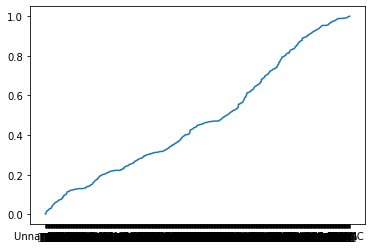

In [ ]:
import matplotlib.pyplot as plt

plt.plot(modle["word"], modle['pvalue'])
plt.show

In [ ]:
X=df.loc[:,modle["word"].head(4)]
Y=df['Close']
X=sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     469.0
Date:                Sun, 30 May 2021   Prob (F-statistic):             0.0346
Time:                        12:18:21   Log-Likelihood:                -32.206
No. Observations:                   6   AIC:                             74.41
Df Residuals:                       1   BIC:                             73.37
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.553e+04    274.772    165.703      0.004     4.2e+04     4.9e+04
발동          4.339e+09   4.71e+09      0.921      0.526   -5.56e+10    6.42e+10
조업         -1.239e+11    1.5e+10     -8.265      0.077   -3.14e+11    6.66e+10
작용          9.864e+10   1.04e+10      9.458      0.067   -3.39e+10    2.31e+11
비전         -2.816e+09    5.5e+09     -0.512      0.699   -7.27e+10    6.71e+10
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.721
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.230
Skew:                          -0.416   Prob(JB):                        0.891
Kurtosis:                       2.525   Cond. No.                     3.07e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.36e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 1년: 분석 전

## 빈도

> 회귀

> 서포트벡터머신

### 회귀

#### 전처리: (260, 49414) -> (260, 2930)

In [ ]:
# 주식데이터 불러오기
stem1 = get_data('005930','2018-03-01','2021-03-01')

In [ ]:
# 가지주
branch1 = get_data('084370','2018-03-01','2021-03-01') # 유진테크
branch2 = get_data('002710','2018-03-01','2021-03-01') # TCC스틸

In [ ]:
# 뉴스데이터 불러오기
SS = pd.read_csv("/content/drive/MyDrive/통계적종합설계/data2_year/SS200301-210301.csv", index_col=0)
SS.index = pd.to_datetime(SS.index)

In [ ]:
# 주식데이터 중 해당 날짜 선택
data0 = stem1.loc['2020-03-01':'2021-03-01',]
data1 = stem1.loc['2020-02-28':'2021-03-01',].diff() # 차분에 사용
data1.dropna(inplace=True)
eugenetech = branch1.loc['2020-03-01':'2021-03-01',]
TCCsteel = branch2.loc['2020-03-01':'2021-03-01',]

In [ ]:
# 주말 기사 제외: ss
SS.index = pd.to_datetime(SS.index)
ss = SS[SS.index.to_series().dt.dayofweek < 5]
ss = ss.loc['2020-03-01':'2021-03-01',]
ss = ss.fillna(0)
ss.shape

(260, 49414)

In [ ]:
# 값이 모두 0인 열 빼기: ss
sss1 = pd.DataFrame(np.where(ss > 0, 1, ss))
sss1.columns = ss.columns
sss1 = sss1.append(sss1.sum(axis=0), ignore_index=True)
sss1 = sss1.loc[:,sss1.loc[sss1.shape[0]-1,:]>0]
ss1 = ss.loc[:,sss1.columns]
ss=ss1

In [ ]:
# Ind = SS[SS.duplicated(keep=False)].index
# SS1 = ss[Ind]

In [ ]:
# 중복열 제거(첫번째 남김). 
SS = ss.T
SSS = SS.drop_duplicates(keep='first')
SSS1 = SSS.T

In [ ]:
# 영분산 제거: R 사용
# SSS1.to_csv("/content/drive/MyDrive/통계적종합설계/ss200301-210301.csv")
SSS2 = pd.read_csv("/content/drive/MyDrive/통계적종합설계/filter_ss200301-210301.csv", index_col=0)
SSS2.index = pd.to_datetime(SSS2.index)
SSS2.shape

(260, 2930)

In [ ]:
# 일주일 중 적어도 2일 이상 언급된 단어만 추출
#sss1 = pd.DataFrame(np.where(ss > 0, 1, ss))
#sss1.columns = ss.columns
#sss1.set_index(ss.index, inplace=True)

In [ ]:
# 일주일 중 적어도 2일 이상 언급된 단어만 추출
#sss1 = pd.DataFrame(np.where(ss > 0, 1, ss))
#sss1.columns = ss.columns
#sss1 = sss1.append(sss1.sum(axis=0), ignore_index=True)

In [ ]:
# 일주일 중 적어도 2일 이상 언급된 단어만 추출
#sss1 = pd.DataFrame(np.where(ss > 0, 1, ss))
#sss1.columns = ss.columns
#sss1 = sss1.append(sss1.sum(axis=0), ignore_index=True)
#sss1 = sss1.loc[:,sss1.loc[sss1.shape[0]-1,:]>0]
#ss1 = ss.loc[:,sss1.columns]

In [ ]:
# 주식데이터와 뉴스 데이터 합치기
df0 = pd.concat([data0.Close,SSS2],axis = 1, join='inner') # 전처리된 뉴스데이터 사용
df1 = pd.concat([data0.Close,SSS2],axis = 1, join='inner') # 차분에 사용
eugene = pd.concat([eugenetech.Close,SSS2],axis = 1, join='inner')
TCC = pd.concat([TCCsteel.Close,SSS2],axis = 1, join='inner')

In [ ]:
df0.shape

(246, 2931)

In [ ]:
close = df0.Close
word = df0.iloc[:,1:]

2020년3월1일 - 2020년4월1일 단어수: 3,487개

2020년3월1일 - 2021년3월1일 단어수: 20,174개
> 영분산 제거 단어수: 2,930개

열의 개수가 행의 개수보다 많으면 안됨. -> 단변량도 해당되는 내용인가요?

공분산 0.999이상 다 제거

#### 종가

##### OLS 단변량 회귀

###### 반복문

In [ ]:
li1 = []
li2 = []
for i in word:
  X = word.loc[:,i]
  Y = close
  X = sm.add_constant(X)
  model = sm.OLS(Y,X)
  results = model.fit()
  li1.append(i)
  li2.append(results.f_pvalue)

###### dataframe: modle

In [ ]:
modle = pd.DataFrame({"word":li1})
modle['pvalue']=li2

###### pvalue 오름차순 정렬

In [ ]:
import numpy as np
modle = pd.DataFrame(modle)
modle = modle.fillna(0)
modle = modle.sort_values(["pvalue"])
modle.head()

,word,pvalue
2906,등락률,1.851216e-12
2922,순위종목명수량주,3.338973e-12
2921,순위종목명금액주가,5.272458e-12
2897,나무,1.909198e-11
1116,감염증,8.712302e-11


In [ ]:
import matplotlib.pyplot as plt

plt.plot(modle["word"], modle['pvalue'])
plt.show

###### pvalue 저장

In [ ]:
# modle.to_csv("/content/drive/MyDrive/통계적종합설계/ss_year_pvalue.csv")

##### OLS 다변량 회귀: modle["word"].head(89)

###### 삼성전자: 0.736 

In [ ]:
# 삼성전자
X=df0.loc[:,modle["word"].head(89)]
Y=df0['Close']
X=sm.add_constant(X)
model = sm.OLS(Y,X)
Samsung = model.fit()
Samsung.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     5.164
Date:                Sun, 30 May 2021   Prob (F-statistic):           2.38e-19
Time:                        13:05:15   Log-Likelihood:                -2503.3
No. Observations:                 246   AIC:                             5181.
Df Residuals:                     159   BIC:                             5486.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.568e+04   1203.476     54.571      0.000    6.33e+04    6.81e+04
등락률        -4735.1657   7783.593     -0.608      0.544   -2.01e+04    1.06e+04
순위종목명수량주   -1.256e+04   9212.355     -1.363      0.175   -3.08e+04    5636.384
순위종목명금액주가   7822.8163   8223.189      0.951      0.343   -8417.951    2.41e+04
나무           566.5078   8071.453      0.070      0.944   -1.54e+04    1.65e+04
감염증        -1885.9863   1357.167     -1.390      0.167   -4566.386     794.414
X2019년      2133.5642    491.564      4.340      0.000    1162.727    3104.402
상위          -428.8006    513.650     -0.835      0.405   -1443.257     585.656
공매도         1338.3400    704.547      1.900      0.059     -53.138    2729.818
기사          -176.9917    432.185     -0.410      0.683   -1030.556     676.572
작성           107.6798    614.852      0.175      0.861   -1106.650    1322.010
섹터1삼성전자    -5460.6731   5403.787     -1.011      0.314   -1.61e+04    5211.787
연관          -661.4219   1181.848     -0.560      0.577   -2995.567    1672.723
전일          3727.1132   2713.831      1.373      0.172   -1632.692    9086.919
바이러스        -551.1917    380.218     -1.450      0.149   -1302.122     199.738
화장품        -1700.7831   1548.052     -1.099      0.274   -4758.179    1356.613
종합반도체       4156.2190   3440.115      1.208      0.229   -2637.994     1.1e+04
신종         -1043.9076   1364.707     -0.765      0.445   -3739.198    1651.383
모바일게임       5211.2682   2835.395      1.838      0.068    -388.626    1.08e+04
코로나바이러스     2241.0284   1394.089      1.608      0.110    -512.292    4994.349
실시간          233.4490    571.854      0.408      0.684    -895.960    1362.858
선물            22.3267    576.227      0.039      0.969   -1115.720    1160.373
X1주일        1777.2611   1825.793      0.973      0.332   -1828.673    5383.196
수량           550.7897    770.153      0.715      0.476    -970.259    2071.839
바이오시밀러      -574.0816   2218.977     -0.259      0.796   -4956.553    3808.389
X9만          436.1160    451.233      0.966      0.335    -455.067    1327.299
확산          -295.6294    332.495     -0.889      0.375    -952.306     361.047
중점적        -7150.4674   3756.812     -1.903      0.059   -1.46e+04     269.222
연비개선        1521.3151   3336.466      0.456      0.649   -5068.192    8110.822
날짜주가등락률    -7949.5051   9895.708     -0.803      0.423   -2.75e+04    1.16e+04
Oil        -5082.1247   4793.409     -1.060      0.291   -1.45e+04    4384.841
반대          -630.6379    572.659     -1.101      0.272   -1761.638     500.362
한경로보뉴스      5119.5400   3978.994      1.287      0.200   -2738.958     1.3e+04
오스틴          698.4194    165.021      4.232      0.000     372.504    1024.335
코로나19        121.2578     96.114      1.262      0.209     -68.567     311.082
항공사        -1473.6114   2291.722     -0.643      0.521   -5999.753    3052.530
CE

###### 유진테크: 0.796 

In [ ]:
# 유진테크
X=eugene.loc[:,modle["word"].head(89)]
Y=eugene['Close']
X=sm.add_constant(X)
model = sm.OLS(Y,X)
Eugenetech = model.fit()
Eugenetech.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     7.207
Date:                Sun, 30 May 2021   Prob (F-statistic):           8.71e-27
Time:                        13:05:18   Log-Likelihood:                -2337.0
No. Observations:                 246   AIC:                             4848.
Df Residuals:                     159   BIC:                             5153.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.092e+04    612.234     50.507      0.000    2.97e+04    3.21e+04
등락률        -5435.1351   3959.681     -1.373      0.172   -1.33e+04    2385.220
순위종목명수량주   -9449.6031   4686.523     -2.016      0.045   -1.87e+04    -193.738
순위종목명금액주가   4014.4680   4183.313      0.960      0.339   -4247.559    1.23e+04
나무          2238.0231   4106.121      0.545      0.586   -5871.551    1.03e+04
감염증        -1319.8742    690.420     -1.912      0.058   -2683.451      43.703
X2019년       923.6229    250.069      3.693      0.000     429.737    1417.509
상위           -97.0216    261.305     -0.371      0.711    -613.097     419.054
공매도          743.6480    358.418      2.075      0.040      35.773    1451.523
기사            32.0886    219.862      0.146      0.884    -402.138     466.315
작성           -48.4510    312.788     -0.155      0.877    -666.207     569.305
섹터1삼성전자    -4750.6775   2749.023     -1.728      0.086   -1.02e+04     678.632
연관          -546.1536    601.231     -0.908      0.365   -1733.583     641.276
전일           707.8530   1380.584      0.513      0.609   -2018.795    3434.501
바이러스        -273.5535    193.425     -1.414      0.159    -655.568     108.461
화장품          234.1183    787.527      0.297      0.767   -1321.245    1789.482
종합반도체       2686.5473   1750.060      1.535      0.127    -769.815    6142.910
신종           -58.1500    694.256     -0.084      0.933   -1429.302    1313.002
모바일게임       2833.2739   1442.426      1.964      0.051     -15.513    5682.060
코로나바이러스      863.3507    709.203      1.217      0.225    -537.323    2264.024
실시간          205.8785    290.914      0.708      0.480    -368.676     780.433
선물            31.5330    293.139      0.108      0.914    -547.416     610.482
X1주일         194.6882    928.820      0.210      0.834   -1639.728    2029.105
수량           112.2581    391.793      0.287      0.775    -661.532     886.048
바이오시밀러      -901.6833   1128.841     -0.799      0.426   -3131.141    1327.774
X9만          -18.4205    229.552     -0.080      0.936    -471.784     434.943
확산          -115.5668    169.147     -0.683      0.495    -449.632     218.499
중점적        -3379.4858   1911.171     -1.768      0.079   -7154.041     395.070
연비개선         551.2560   1697.332      0.325      0.746   -2800.968    3903.480
날짜주가등락률    -5924.8149   5034.159     -1.177      0.241   -1.59e+04    4017.630
Oil        -1936.7774   2438.510     -0.794      0.428   -6752.826    2879.271
반대          -574.8184    291.324     -1.973      0.050   -1150.182       0.546
한경로보뉴스      3092.1965   2024.200      1.528      0.129    -905.590    7089.983
오스틴          297.1814     83.950      3.540      0.001     131.381     462.982
코로나19         57.7294     48.895      1.181      0.239     -38.838     154.297
항공사         -783.5188   1165.848     -0.672      0.503   -3086.064    1519.027
CE

###### TCC스틸: 0.717 

In [ ]:
# TCC스틸
X=TCC.loc[:,modle["word"].head(89)]
Y=TCC['Close']
X=sm.add_constant(X)
model = sm.OLS(Y,X)
TCCsteel = model.fit()
TCCsteel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     4.683
Date:                Sun, 30 May 2021   Prob (F-statistic):           2.26e-17
Time:                        13:05:22   Log-Likelihood:                -1965.6
No. Observations:                 246   AIC:                             4105.
Df Residuals:                     159   BIC:                             4410.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3725.3016    135.235     27.547      0.000    3458.212    3992.391
등락률         -627.8797    874.647     -0.718      0.474   -2355.304    1099.544
순위종목명수량주   -1568.8296   1035.198     -1.515      0.132   -3613.341     475.682
순위종목명금액주가    940.9499    924.044      1.018      0.310    -884.034    2765.934
나무             2.7641    906.994      0.003      0.998   -1788.545    1794.073
감염증         -316.9213    152.506     -2.078      0.039    -618.119     -15.723
X2019년       176.5666     55.237      3.197      0.002      67.473     285.660
상위           -65.3057     57.719     -1.131      0.260    -179.301      48.689
공매도           86.0783     79.170      1.087      0.279     -70.283     242.440
기사             0.1140     48.565      0.002      0.998     -95.802      96.029
작성            29.9516     69.091      0.434      0.665    -106.503     166.407
섹터1삼성전자     -496.1165    607.227     -0.817      0.415   -1695.387     703.154
연관          -130.1421    132.805     -0.980      0.329    -392.431     132.147
전일           539.1595    304.955      1.768      0.079     -63.125    1141.444
바이러스        -100.1527     42.725     -2.344      0.020    -184.535     -15.770
화장품         -232.4080    173.955     -1.336      0.183    -575.969     111.153
종합반도체        489.1707    386.568      1.265      0.208    -274.299    1252.640
신종           -78.0844    153.353     -0.509      0.611    -380.956     224.787
모바일게임        766.8223    318.615      2.407      0.017     137.559    1396.086
코로나바이러스      297.6406    156.655      1.900      0.059     -11.752     607.033
실시간           38.2206     64.260      0.595      0.553     -88.692     165.133
선물             6.4121     64.751      0.099      0.921    -121.471     134.295
X1주일         285.7892    205.165      1.393      0.166    -119.412     690.990
수량            89.2967     86.543      1.032      0.304     -81.624     260.218
바이오시밀러       155.3525    249.348      0.623      0.534    -337.108     647.813
X9만           11.3974     50.705      0.225      0.822     -88.745     111.540
확산           -24.3816     37.363     -0.653      0.515     -98.173      49.409
중점적         -508.7209    422.155     -1.205      0.230   -1342.476     325.034
연비개선         184.9992    374.921      0.493      0.622    -555.467     925.466
날짜주가등락률    -1081.0367   1111.986     -0.972      0.332   -3277.206    1115.132
Oil         -706.2604    538.638     -1.311      0.192   -1770.069     357.548
반대           -26.9080     64.350     -0.418      0.676    -153.999     100.183
한경로보뉴스       365.8179    447.122      0.818      0.414    -517.246    1248.882
오스틴           54.3014     18.543      2.928      0.004      17.678      90.925
코로나19         19.5501     10.800      1.810      0.072      -1.781      40.881
항공사         -210.7185    257.522     -0.818      0.414    -719.324     297.887
CE

#### 로그

In [ ]:
li1 = []
li2 = []
for i in word:
  X = word.loc[:,i]
  Y = np.log(close)
  X = sm.add_constant(X)
  model = sm.OLS(Y,X)
  results = model.fit()
  li1.append(i)
  li2.append(results.f_pvalue)

In [ ]:
df_log = pd.DataFrame({"word":li1})
df_log['pvalue']=li2

In [ ]:
df_log = pd.DataFrame(df_log)
df_log = df_log.fillna(0)
df_log = df_log.sort_values(["pvalue"])
df_log.head()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_log["word"], df_log['pvalue'])
plt.show

In [ ]:
X=df.loc[:,df_log["word"].head(4)]
Y=df['Close']
X=sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

#### 차분

In [ ]:
li1 = []
li2 = []
for i in word:
  X = df1.loc[:,i]
  Y = df1['Close']
  X = sm.add_constant(X)
  model = sm.OLS(Y,X)
  results = model.fit()
  li1.append(i)
  li2.append(results.f_pvalue)

In [ ]:
df_diff = pd.DataFrame({"word":li1})
df_diff['pvalue']=li2

In [ ]:
import numpy as np
df_diff = pd.DataFrame(df_diff)
df_diff = df_diff.fillna(0)
df_diff = df_diff.sort_values(["pvalue"])
df_diff.head()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_diff["word"], df_diff['pvalue'])
plt.show

In [ ]:
X=df.loc[:,df_diff["word"].head(4)]
Y=df['Close']
X=sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

### 모형

#### 전처리

##### 주식데이터 불러오기

In [ ]:
# 주식데이터 불러오기
stem1 = get_data('005930','2018-03-01','2021-03-01')
# 코스피:KS11, 코스닥:KQ11
KS = get_data('KS11','2018-03-01','2021-03-01')
KQ = get_data('KQ11','2018-03-01','2021-03-01')
# 주식데이터 중 해당 날짜 선택
data0 = stem1.loc['2020-03-01':'2021-03-01',]

In [ ]:
# 코스피, 코스닥의 'Close'열 이름 변경
KS.rename(columns={'Close':'KOSPI'},inplace=True)
KQ.rename(columns={'Close':'KOSDAQ'},inplace=True)

##### 뉴스데이터 불러오기

In [ ]:
# 전처리한 단어의 pvalue
word = pd.read_csv("/content/drive/MyDrive/통계적종합설계/ss_year_pvalue.csv", index_col=0)

In [ ]:
# 전처리한 단어의 count
SSS2 = pd.read_csv("/content/drive/MyDrive/통계적종합설계/filter_ss200301-210301.csv", index_col=0)
SSS2.index = pd.to_datetime(SSS2.index)

In [ ]:
# 공휴일로 인해 종가와 단어의 행의 개수가 다름.
print(data0.shape)
print(SSS2.shape)

(246, 6)
(260, 2930)


##### 종가데이터와 뉴스데이터 합치기

In [ ]:
df0 = pd.concat([data0.Close,KS.KOSPI,KQ.KOSDAQ,SSS2],axis = 1, join='inner')
# df0 = pd.concat([data0.Close,SSS2],axis = 1, join='inner')
# df0 = pd.concat([data0.Close,KS.KOSPI,KQ.KOSDAQ,X],axis = 1, join='inner')
df0.shape

(246, 2933)

##### 상관계수 계산

In [ ]:
# df_cor = df0.corr().iloc[:,0].sort_values(ascending=False)

In [ ]:
df_cor = df0.corr()
#위에꺼는 행렬을 한열의 시리얼로 줄인거라 안돌아간거같아

In [ ]:
cor_target=abs(df_cor['Close']) 
selected_features_by_corr=cor_target[(cor_target>0.25)|(cor_target<-0.30)].index.values.tolist()
selected_features_by_corr.remove('Close')
X = df0[selected_features_by_corr]

In [ ]:
x_train = X.loc[X.index <= '2020-12-31',:]

##### 전처리 된 데이터 저장

In [ ]:
#df0.to_csv("/content/drive/MyDrive/통계적종합설계/df0_ss_year.csv")

##### 전처리 된 데이터 불러오기

In [ ]:
df0 = pd.read_csv("/content/drive/MyDrive/통계적종합설계/df0_ss_year.csv", index_col=0)
df0.shape

(246, 89)

##### 설명변수(x)와 반응변수(y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
### 설명변수(x)와 반응변수(y)
x = df0.iloc[:,1:]
x.std = StandardScaler().fit_transform(x)
y = df0.iloc[:,0:1]

##### Train & Test data

In [ ]:
### Train & Test data
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
x_train = x.loc[x.index <= '2020-12-31',:]
x_test = x.loc[x.index > '2020-12-31',:]
#x_train = X.loc[X.index <= '2020-12-31',:]
#x_test = X.loc[X.index > '2020-12-31',:]
y_train = y.loc[y.index <= '2020-12-31']
y_test = y.loc[y.index > '2020-12-31']

In [ ]:
x_test.shape

(38, 88)

#### SVR: 29456.466465197413

> Support Vector Regression  
> 연속형 변수를 예측하는 서포트벡터머신  

In [ ]:
from sklearn.svm import SVR

In [ ]:
### SVR
svc = SVR(C=1)
model = svc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
### 예측
y_pred = model.predict(x_test)
y_pred

array([55609.27987267, 55609.85586011, 55609.57336675, 55610.32673683,
       55611.53450314, 55611.459375  , 55611.23247397, 55611.46956589,
       55611.49095772, 55610.78968654, 55609.92542564, 55610.83038634,
       55611.13719988, 55611.59660634, 55611.3986833 , 55612.09894249,
       55611.45535158, 55611.24857313, 55610.598962  , 55609.42216841,
       55610.45106228, 55610.90018668, 55611.25550923, 55610.80995519,
       55611.1527253 , 55610.8303181 , 55610.75062838, 55610.94151838,
       55611.47015603, 55611.60244461, 55611.32885118, 55610.81025364,
       55611.01396842, 55610.68364965, 55610.50226543, 55609.52872679,
       55610.80725795, 55609.77251411])

In [ ]:
### RMSE: 평균제곱근오차
np.sqrt(np.mean((np.array(y_test)-y_pred)**2))

29456.466465197413

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred.index = y_test.index
y_pred.rename(columns={0:'y_pred'},inplace=True)

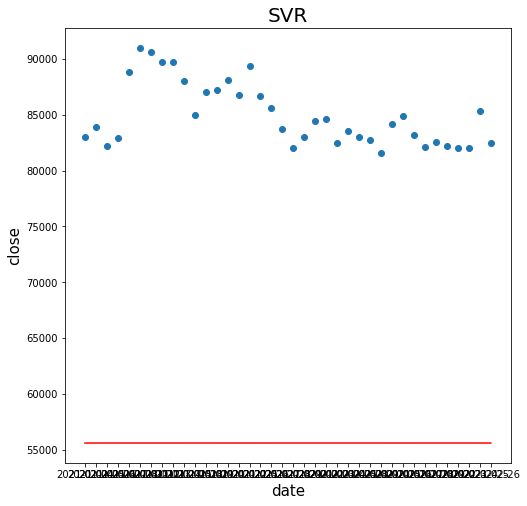

In [ ]:
### 시각화
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(y_test.index,y_test['Close']) ## 원 데이터 산포도
plt.plot(y_pred.index,y_pred['y_pred'],color='r') ## 예측값

plt.title('SVR', fontsize=20)
plt.xlabel('date', fontsize=font_size)
plt.ylabel('close',fontsize=font_size)

plt.show()

#### 로지스틱 회귀: 16716.005318107967

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
### LogisticRegression
logistic = LogisticRegression(multi_class='ovr')
model = logistic.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

In [ ]:
### 예측
y_pred = model.predict(x_test)
y_pred

array([73400, 73900, 73400, 73400, 71500, 73800, 73800, 73900, 73900,
       73400, 54600, 73900, 73900, 73900, 73900, 73900, 73900, 73900,
       73900, 54600, 73900, 54600, 73900, 73900, 73900, 54600, 54600,
       73900, 73900, 54600, 73900, 73900, 73900, 73900, 73900, 54600,
       73900, 73900])

In [ ]:
### RMSE: 평균제곱근오차
np.sqrt(np.mean((np.array(y_test)-y_pred)**2))

16716.005318107967

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred.index = y_test.index
y_pred.rename(columns={0:'y_pred'},inplace=True)

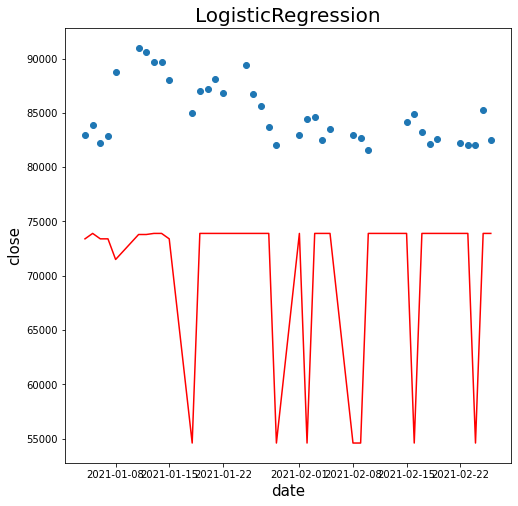

In [ ]:
### 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(y_test.index,y_test['Close']) ## 원 데이터 산포도
plt.plot(y_pred.index,y_pred['y_pred'],color='r') ## 예측값

plt.title('LogisticRegression', fontsize=20)
plt.xlabel('date', fontsize=font_size)
plt.ylabel('close',fontsize=font_size)

plt.show()

#### 선형회귀: 2860.81880894722

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
### LinearRegression
model = LinearRegression(fit_intercept=True).fit(x_train, y_train)

In [ ]:
### 예측
y_pred = model.predict(x_test)
y_pred

array([[80503.22070199],
       [79363.4315897 ],
       [81582.08005019],
       [79799.15535472],
       [87517.511249  ],
       [87379.63589219],
       [87583.87091924],
       [87967.74383376],
       [87724.37889742],
       [87617.10038832],
       [83543.04446415],
       [87046.50461972],
       [85476.98371673],
       [88083.1184777 ],
       [87526.77807022],
       [89234.34415537],
       [86950.95934734],
       [86905.10160859],
       [85349.76512114],
       [82766.51642388],
       [83855.79802508],
       [86074.72174787],
       [87867.60247498],
       [84683.99322172],
       [87845.7383659 ],
       [85741.15573798],
       [86244.10496814],
       [85539.54297476],
       [86311.71525206],
       [88132.35107271],
       [89538.19807459],
       [85502.91812943],
       [86079.13204834],
       [85174.86877283],
       [85878.51496634],
       [89251.61752955],
       [86760.50657271],
       [83814.01449123]])

In [ ]:
### RMSE: 평균제곱근오차
np.sqrt(np.mean((np.array(y_test)-y_pred)**2))

2860.81880894722

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred.index = y_test.index
y_pred.rename(columns={0:'y_pred'},inplace=True)

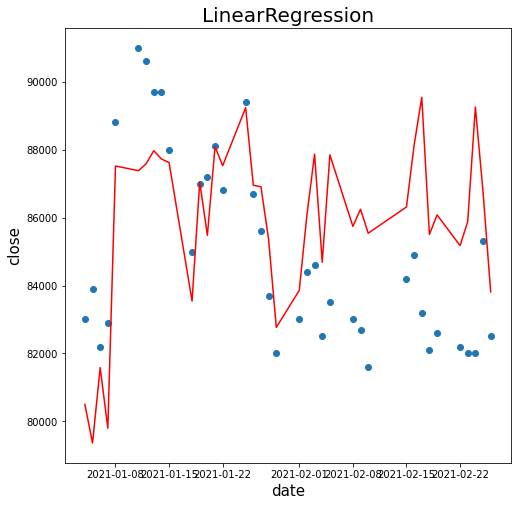

In [ ]:
### 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(y_test.index,y_test['Close']) ## 원 데이터 산포도
plt.plot(y_pred.index,y_pred['y_pred'],color='r') ## 예측값

plt.title('LinearRegression', fontsize=20)
plt.xlabel('date', fontsize=font_size)
plt.ylabel('close',fontsize=font_size)

plt.show()

#### OLS(최소자승법) 회귀: 3836.970118157939

In [ ]:
x_train.shape

(208, 88)

In [ ]:
### OLS
X=x
Y=y
X=sm.add_constant(X)
model = sm.OLS(Y,X).fit()     

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     192.3
Date:                Wed, 26 May 2021   Prob (F-statistic):          3.20e-129
Time:                        04:54:10   Log-Likelihood:                -2097.0
No. Observations:                 246   AIC:                             4366.
Df Residuals:                     160   BIC:                             4667.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6056.2495   1817.223     -3.333      0.001   -9645.085   -2467.414
KOSPI         41.5140      1.162     35.728      0.000      39.219      43.809
KOSDAQ       -39.5321      4.576     -8.640      0.000     -48.569     -30.496
확산            84.8350     63.631      1.333      0.184     -40.830     210.500
조사             1.7415     21.523      0.081      0.936     -40.764      44.247
오스틴          -28.4599     33.222     -0.857      0.393     -94.071      37.151
직원들         -156.2967    103.229     -1.514      0.132    -360.164      47.571
X2019년       -76.5784     98.532     -0.777      0.438    -271.170     118.013
자체           150.5227     50.938      2.955      0.004      49.925     251.121
유럽           -60.2443     37.916     -1.589      0.114    -135.124      14.636
집약           583.6570    387.537      1.506      0.134    -181.690    1349.004
시행          -206.2107     89.297     -2.309      0.022    -382.563     -29.858
테마            56.4351    153.530      0.368      0.714    -246.771     359.641
금액           -49.0877     64.658     -0.759      0.449    -176.782      78.606
상위           -70.5920     96.901     -0.728      0.467    -261.962     120.778
코로나19        -10.2667     18.404     -0.558      0.578     -46.613      26.080
해외           -18.4256     39.798     -0.463      0.644     -97.023      60.172
X9만          -18.7179     86.562     -0.216      0.829    -189.669     152.234
코로나바이러스     -243.5200    265.701     -0.917      0.361    -768.254     281.214
CES           87.4636     34.066      2.568      0.011      20.187     154.740
기초지수        -320.6452   1628.942     -0.197      0.844   -3537.645    2896.354
동향          -121.1943    249.821     -0.485      0.628    -614.566     372.177
Fund        4740.2062   3624.064      1.308      0.193   -2416.964    1.19e+04
Exchange   -4565.5129   4929.704     -0.926      0.356   -1.43e+04    5170.168
수량           152.0317    139.536      1.090      0.278    -123.538     427.601
감염증          280.5287    256.980      1.092      0.277    -226.982     788.040
건설사          176.4586    189.403      0.932      0.353    -197.594     550.511
신종            41.0745    257.924      0.159      0.874    -468.299     550.448
중국           -16.3985     10.719     -1.530      0.128     -37.568       4.771
사태           -18.3521     49.478     -0.371      0.711    -116.065      79.361
연관           150.0524    226.600      0.662      0.509    -297.461     597.566
실시간         -197.3470    108.786     -1.814      0.072    -412.189      17.495
작성            52.9463    114.170      0.464      0.643    -172.528     278.421
사이클            4.5255    189.748      0.024      0.981    -370.208     379.259
중점적          140.5378    725.178      0.194      0.847   -1291.618    1572.693
조치           -37.1826     52.150     -0.713      0.477    -140.173      65.808
X2

In [ ]:
### 예측
x_test1 = sm.add_constant(x_test)
y_pred = model.predict(x_test1)
y_pred

2021-01-04    80503.220702
2021-01-05    79363.431590
2021-01-06    81582.080050
2021-01-07    79799.155355
2021-01-08    87517.511249
2021-01-11    87379.635892
2021-01-12    87583.870919
2021-01-13    87967.743834
2021-01-14    87724.378897
2021-01-15    87617.100388
2021-01-18    83543.044464
2021-01-19    87046.504620
2021-01-20    85476.983717
2021-01-21    88083.118478
2021-01-22    87526.778070
2021-01-25    89234.344155
2021-01-26    86950.959347
2021-01-27    86905.101609
2021-01-28    85349.765121
2021-01-29    82766.516424
2021-02-01    83855.798025
2021-02-02    86074.721748
2021-02-03    87867.602475
2021-02-04    84683.993222
2021-02-05    87845.738366
2021-02-08    85741.155738
2021-02-09    86244.104968
2021-02-10    85539.542975
2021-02-15    86311.715252
2021-02-16    88132.351073
2021-02-17    89538.198075
2021-02-18    85502.918129
2021-02-19    86079.132048
2021-02-22    85174.868773
2021-02-23    85878.514966
2021-02-24    89251.617530
2021-02-25    86760.506573
2

In [ ]:
## RMSE: 평균제곱근오차
np.sqrt(np.mean((np.array(y_test)-np.array(y_pred))**2))

3836.970118157939

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred.rename(columns={0:'y_pred'},inplace=True)

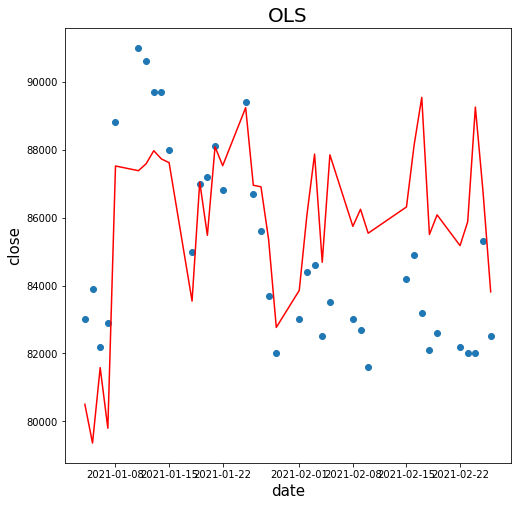

In [ ]:
### 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(y_test.index,y_test['Close']) ## 원 데이터 산포도
plt.plot(y_pred.index,y_pred['y_pred'],color='r') ## 예측값

plt.title('OLS', fontsize=20)
plt.xlabel('date', fontsize=font_size)
plt.ylabel('close',fontsize=font_size)

plt.show()

#### 정리

선형회귀모형의 평균제곱근오차가 가장 작으므로 다른 분석 기법에 비해 잘 예측했다. 

# 뉴스데이터 날짜 + 1 예시

In [ ]:
SS = pd.read_csv("/content/drive/MyDrive/통계적종합설계/data2_day7/SS200316-200323.csv", index_col=0)
SS.index = pd.to_datetime(SS.index)

In [ ]:
SS.index

DatetimeIndex(['2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

In [ ]:
date = []
for i in range(SS.shape[0]):
  date.append(to_integer((SS.index[i] + dt.timedelta(days=1)).date()))
date

[20200317,
 20200318,
 20200319,
 20200320,
 20200321,
 20200322,
 20200323,
 20200324]

In [ ]:
date = pd.to_datetime(date, format='%Y%m%d')

In [ ]:
date

DatetimeIndex(['2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24'],
              dtype='datetime64[ns]', freq=None)